In [2]:
#load the libraries
import pandas as pd
import numpy as np
import pandas_profiling as pp
import sweetviz as sv

In [3]:
data1 = pd.read_csv("Salary_Data.csv")

In [4]:
data1

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
data1.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
#Data Structure 
type(data1)


pandas.core.frame.DataFrame

In [7]:
data1.shape

(30, 2)

In [8]:
#data types
data1.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [10]:
data1.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [11]:
data1.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

In [12]:
#The method .copy() is used here so that any changes made in new DataFrame don't get reflected in the original one
data1.copy()
data1.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [13]:
#Count of duplicated rows
data1.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

In [14]:
data1[data1.duplicated()].shape

(0, 2)

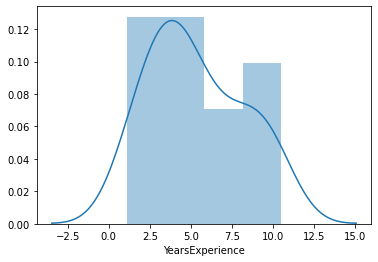

In [15]:
import seaborn as sns
sns.distplot(data1['YearsExperience'])

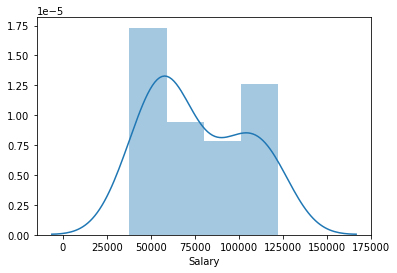

In [16]:
import seaborn as sns
sns.distplot(data1['Salary'])

In [17]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~YearsExperience",data = data1).fit()

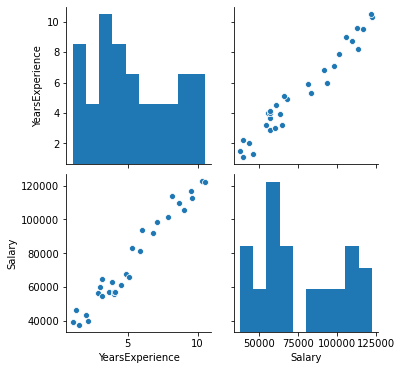

In [18]:
sns.pairplot(data1)

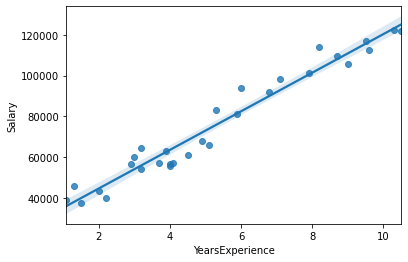

In [19]:
sns.regplot(x="YearsExperience", y="Salary", data=data1);

In [20]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [21]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 03 Jan 2021   Prob (F-statistic):           1.14e-20
Time:                        07:40:02   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [24]:
#rename the Solar column
data_cleaned1= data1.rename({'YearsExperience': 'Years_Experience'}, axis=1)
data_cleaned2= data1.rename({'Salary': 'Salary_S'}, axis=1)
data=data_cleaned1+data_cleaned2

In [25]:
data

,Salary,Salary_S,YearsExperience,Years_Experience
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [26]:
#Predict for 1and 10  YearsExperienc circulation
newdata=pd.Series([1,10])

In [27]:

data_pred1=pd.DataFrame(newdata,columns=['YearsExperience'])


In [28]:

model.predict(data_pred1)

0     35242.162520
1    120291.823413
dtype: float64

In [29]:
#Predict for 35000and 50000 Salary  circulation
newdata=pd.Series([35000,50000])

In [30]:
data_pred1=pd.DataFrame(newdata,columns=['Salary~YearsExperience'])


In [31]:
data_pred1

,Salary~YearsExperience
0,35000
1,50000


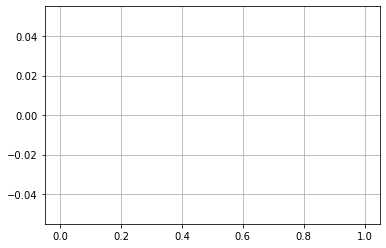

In [32]:
# histogram of Ozone
data['Salary_S'].hist()

In [34]:
model2=smf.ols("Salary~np.log(YearsExperience)",data=data1).fit()

In [35]:
model2.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [36]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sun, 03 Jan 2021   Prob (F-statistic):           3.25e-13
Time:                        08:57:27   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
model3=smf.ols("Salary~np.exp(YearsExperience)",data=data1).fit()

In [38]:
model3.params

Intercept                  67568.624969
np.exp(YearsExperience)        2.136040
dtype: float64

In [39]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     25.07
Date:                Sun, 03 Jan 2021   Prob (F-statistic):           2.72e-05
Time:                        08:59:05   Log-Likelihood:                -339.03
No. Observations:                  30   AIC:                             682.1
Df Residuals:                      28   BIC:                             684.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                6.757e+04   4065.396     16.620      0.000    5.92e+04    7.59e+04
np.exp(YearsExperience)     2.1360      0.427      5.007      0.000       1.262       3.010
==============================================================================
Omnibus:                        4.567   Durbin-Watson:                   0.202
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                1.966
Skew:                           0.276   Prob(JB):                        0.374
Kurtosis:                       1.874   Cond. No.                     1.05e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
model.conf_int(0.05) # 95% confidence interval


,0,1
Intercept,21136.061314,30448.339084
YearsExperience,8674.118747,10225.805896


In [41]:
pred = model.predict(data1) # Predicted values of Salary using the model

In [43]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Salary')

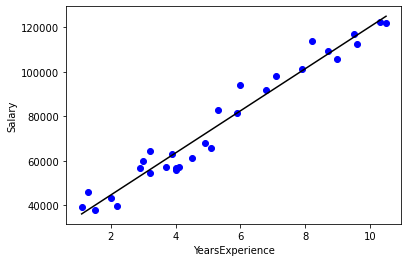

In [45]:
plt.scatter(x=data1.YearsExperience, y=data1.Salary, color='blue')
plt.plot(data1.YearsExperience, pred,color='black')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")


In [47]:
pred2 = model2.predict(data1) # Predicted values of Salary using the model

Text(0, 0.5, 'Salary')

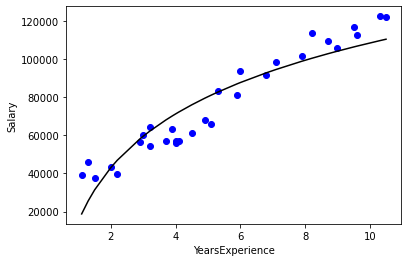

In [48]:
plt.scatter(x=data1.YearsExperience, y=data1.Salary, color='blue')
plt.plot(data1.YearsExperience, pred2,color='black')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

Model is better than Model1.